In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
history = pd.read_hdf('./regelum_data/outputs/2024-04-04/13-02-12/0/.callbacks/HistoricalDataCallback/observations_actions_it_00004_ep_00003.h5')  

In [7]:
# critic = pd.read_hdf('./regelum_data/outputs/2024-04-03/11-58-16/0/.callbacks/CriticObjectiveSaver/C. Policy objective. It 00004.h5')  

In [19]:
policy = pd.read_hdf('./regelum_data/outputs/2024-04-04/13-02-12/0/.callbacks/PolicyObjectiveSaver/C. Policy objective. It 00004.h5')  

In [20]:
policy

,epoch_idx,objective
0,0,13.407593


In [17]:
history

,time,current_value,episode_id,iteration_id,running_objective_portfolio,running_objective_market,delta_volume_0,delta_volume_1,delta_volume_2,delta_volume_3,...,prev_volume_2,prev_volume_3,current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],current_price_3 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD],prev_price_3 [USD]
0,0.00,1.250000e+14,3,4,4.000000e-14,2.500000e+15,-0.073196,-0.032187,0.020048,0.006396,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.05,1.250000e+14,3,4,9.652189e+02,1.036034e-01,-0.027558,-0.002910,0.048971,0.063917,...,1.000000,1.000000,0.991196,1.011783,1.006216,1.010436,1.000000,1.000000,1.000000,1.000000
2,0.10,1.250000e+14,3,4,3.053169e+03,3.275285e-02,0.002885,-0.062282,0.038452,0.026395,...,1.006216,1.010436,1.005643,1.015032,1.004785,1.015165,0.991196,1.011783,1.006216,1.010436
3,0.15,1.250000e+14,3,4,2.980548e+01,3.355087e+00,-0.001724,0.129612,0.064631,-0.044645,...,1.004785,1.015165,1.004667,1.010025,1.007387,1.031145,1.005643,1.015032,1.004785,1.015165
4,0.20,1.250000e+14,3,4,5.524357e+01,1.810165e+00,0.012157,0.067963,-0.003854,0.076757,...,1.007387,1.031145,1.014965,1.012396,1.003874,1.036266,1.004667,1.010025,1.007387,1.031145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.85,1.250000e+14,3,4,1.707155e+02,5.857698e-01,0.021296,0.068096,-0.018330,-0.002310,...,0.909484,1.072617,1.061144,1.016004,0.908260,1.068193,1.060950,1.017366,0.909484,1.072617
138,6.90,1.250000e+14,3,4,6.594495e-01,1.516416e+02,-0.010750,-0.011669,-0.054256,-0.082201,...,0.908260,1.068193,1.062617,1.021741,0.898091,1.069905,1.061144,1.016004,0.908260,1.068193
139,6.95,1.250000e+14,3,4,2.206465e-01,4.532136e+02,0.121101,-0.042847,-0.036226,-0.064651,...,0.898091,1.069905,1.068112,1.025790,0.875799,1.068362,1.062617,1.021741,0.898091,1.069905
140,7.00,1.250000e+14,3,4,3.381524e-01,2.957246e+02,0.019224,-0.055044,0.005681,0.023721,...,0.875799,1.068362,1.061883,1.032347,0.871817,1.071269,1.068112,1.025790,0.875799,1.068362


In [11]:
history.columns

Index(['time', 'current_value', 'episode_id', 'iteration_id',
       'running_objective_portfolio', 'running_objective_market',
       'delta_volume_0', 'delta_volume_1', 'delta_volume_2', 'delta_volume_3',
       'drift_0', 'drift_1', 'drift_2', 'drift_3', 'volatility_0',
       'volatility_1', 'volatility_2', 'volatility_3', 'corr_0_1', 'corr_0_2',
       'corr_0_3', 'corr_1_2', 'corr_1_3', 'corr_2_3', 'cash share', 'share_0',
       'share_1', 'share_2', 'share_3', 'returns_0', 'returns_1', 'returns_2',
       'returns_3', 'cash [USD]', 'first_momentum', 'second_momontum',
       'current_volume_0', 'current_volume_1', 'current_volume_2',
       'current_volume_3', 'prev_volume_0', 'prev_volume_1', 'prev_volume_2',
       'prev_volume_3', 'current_price_0 [USD]', 'current_price_1 [USD]',
       'current_price_2 [USD]', 'current_price_3 [USD]', 'prev_price_0 [USD]',
       'prev_price_1 [USD]', 'prev_price_2 [USD]', 'prev_price_3 [USD]'],
      dtype='object')

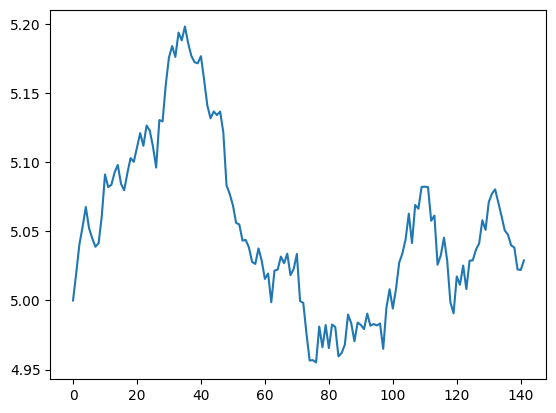

In [18]:
plt.plot(history['current_price_0 [USD]']*history['current_volume_0'] +
         history['current_price_1 [USD]']*history['current_volume_1']+
         history['current_price_2 [USD]']*history['current_volume_2']+
         history['current_price_3 [USD]']*history['current_volume_3']+
         history['cash [USD]'])